## Problem 3: Google Playstore Apps Dataset (63 points)
> Given an Excel data file as represented by the sample file GooglePlaystore.xlsx (10K records), load it into a Pandas DataFrame (use the Pandas read_excel method), and perform the following tasks on it.

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%pip install openpyxl
import openpyxl

Python(43378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [108]:
df = pd.read_excel('./GooglePlaystore.xlsx')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Preprocessing (28 pts)
---
1. [3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [110]:
# find the 3.0M in Reviews
outlier_row = df[df['Reviews'] == '3.0M']

# outlier_row

df = df.drop(outlier_row.index)

2. [4 pts] Remove rows where any of the columns has the value "Varies with device".


In [111]:
varies_with_device = df.isin(['Varies with device'])

rows_with_varies_with_device = varies_with_device.any(axis=1)

print(rows_with_varies_with_device)

df = df[~rows_with_varies_with_device]

0        False
1        False
2        False
3         True
4        False
         ...  
10836    False
10837    False
10838    False
10839     True
10840     True
Length: 10840, dtype: bool


3. [5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".

If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [112]:
df['Android Ver'] = df['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float)

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


4. [5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [113]:
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')

df['Installs'] = df['Installs'].astype(int)

df['Installs']

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_71112/1980216418.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


0          10000
1         500000
2        5000000
4         100000
5          50000
          ...   
10834        500
10835         10
10836       5000
10837        100
10838       1000
Name: Installs, Length: 9059, dtype: int64

In [114]:
df.describe()

,Rating,Installs,Android Ver
count,7643.000000,9.059000e+03,9057.000000
mean,4.172419,6.884536e+06,3.852876
std,0.546060,4.546183e+07,0.842420
min,1.000000,0.000000e+00,1.000000
25%,4.000000,1.000000e+03,4.000000
50%,4.300000,5.000000e+04,4.000000
75%,4.500000,1.000000e+06,4.100000
max,5.000000,1.000000e+09,8.000000


5. [5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [115]:
missing_rating = df['Rating'].isna()

drop_indices = df[missing_rating & ((df['Reviews'] < 100) | (df['Installs'] < 50000))].index

df = df.drop(drop_indices)

df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(round(x.mean(), 2)))

6. [6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [116]:
df['Size'] = df['Size'].replace({'M': '*1e6', 'k': '*1e3'}, regex=True).map(pd.eval).astype(int)

df['Size']

0        19000000
1        14000000
2         8700000
4         2800000
5         5600000
           ...   
10832      582000
10833      619000
10834     2600000
10836    53000000
10837     3600000
Name: Size, Length: 7661, dtype: int64

---

### Visualization (16 pts)

[9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
Count the number of applications per genre and display it using a pie chart.
Hint: Read about DataFrame.explode()


In [117]:
df['Genres']

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
4          Art & Design;Creativity
5                     Art & Design
                   ...            
10832                      Weather
10833            Books & Reference
10834                    Education
10836                    Education
10837                    Education
Name: Genres, Length: 7661, dtype: object

<Axes: ylabel='Genres'>

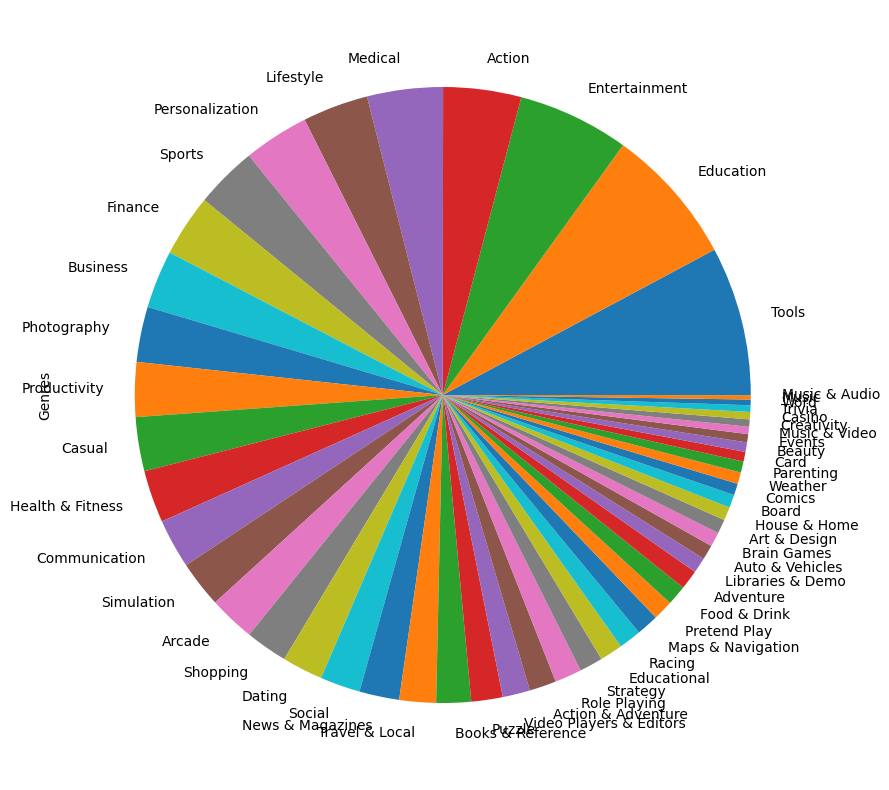

In [118]:
df['Genres'] = df['Genres'].str.split(';')

df_genres = df.explode('Genres')

genre_counts = df_genres['Genres'].value_counts()

genre_counts.plot(kind='pie', figsize=(10, 10))

[7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.